# Algoritmos de Machine Learning con Iris dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#metrics & ml
from sklearn import datasets, tree
from sklearn.metrics import accuracy_score ,precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.svm import LinearSVC

#visualziation
import plotly as py
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
import graphviz
init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings("ignore")

## 1. Base de datos - lirios

In [2]:
iris = datasets.load_iris()
X, y = iris.data, iris.target
X = pd.DataFrame(X, columns = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'])
y = pd.DataFrame(y, columns = ['Species'])

df = pd.concat([X,y], axis=1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
 # dataframe de los tipos de lirios
i_setosa = df[df['Species']  == 0]
i_versicolor = df[df['Species']  == 1]
i_virginica = df[df['Species']  == 2]

 # Iris-setosa
trace_setosa = go.Scatter3d(
                        x = i_setosa.SepalLengthCm,
                        y = i_setosa.SepalWidthCm,
                        z = i_setosa.PetalLengthCm,
                        mode = 'markers',
                        opacity = 0.7,
                        name = "Iris-setosa",
                        marker = dict(size = 5, color = 'rgba(255,102, 255,0.8)'))

 # Iris-versicolor
trace_versicolor = go.Scatter3d(
                        x = i_versicolor.SepalLengthCm,
                        y = i_versicolor.SepalWidthCm,
                        z = i_versicolor.PetalLengthCm,
                        mode = 'markers',
                        opacity = 0.7,
                        name = "Iris-versicolor",
                        marker = dict(size = 5, color = 'rgba(102, 255, 51, 0.8)'))

 # Iris-virginica
trace_virginica = go.Scatter3d(
                        x = i_virginica.SepalLengthCm,
                        y = i_virginica.SepalWidthCm,
                        z = i_virginica.PetalLengthCm,
                        mode = 'markers',
                        opacity = 0.7,
                        name = "Iris-virginica",
                        marker = dict(size = 5, color = 'rgba(51, 102, 255, 0.8)'))


    
list_3d = [trace_setosa, trace_versicolor, trace_virginica]
fig_3d = go.Figure(data = list_3d)

fig_3d.update_layout(scene = dict(
                    xaxis_title='SepalLengthCm',
                    yaxis_title='SepalWidthCm',
                    zaxis_title='PetalLengthCm'),
                    width=700,
                    margin=dict(r=20, b=10, l=10, t=10))

iplot(fig_3d)

In [4]:
#creating coordinate figure
fig4=go.Figure(data=go.Parcoords(
                        #customizing
                        line=dict(
                        color=df.Species.astype('category').cat.codes,
                        colorscale=[[0,'rgb(52, 152, 219)'],[0.33,'rgb(52, 152, 219)'],
                                    [0.33,'rgb(170, 128, 255)'],[0.66,'rgb(170, 128, 255)'],
                                    [0.66,'rgb(241, 196, 15)'],[1,'rgb(241, 196, 15)']],
                        colorbar=dict(title='Species', thickness=45,
                                  tickvals=[0,1,2], ticktext=['Setosa', 'Versicolor', 'Virginica'],
                                  lenmode='pixels', len=120, bordercolor='#000', borderwidth=1,
                                  ticks='outside')),
                        #setting dimensions represented in the plot
                        dimensions=list([
                                    dict(range=[0,8],
                                    constraintrange=[1.9,4.5],
                                    label='Sepal Width Cm', values=df.SepalWidthCm),
                                    dict(range=[0,8],
                                    constraintrange=[4,8],
                                    label='Sepal Length Cm', values=df.SepalLengthCm),
                                    dict(range=[0,8],
                                    constraintrange=[0,2.7],
                                    label='Petal Width Cm', values=df.PetalWidthCm),
                                    dict(range=[0,8],
                                    constraintrange=[1,7],
                                    label='Petal Length Cm', values=df.PetalLengthCm)
                                    ])
))
#customizing layout
fig4.update_layout(template='plotly_white', title_text='Sepal/Petal Coordinates Plot', title_x=0.5)
#showing figure
fig4.show()

# 2. Algoritmos de Machine Learning

## K-Nearest-Neighbors

K-Nearest-Neighbor es un algoritmo de Machine Learning de tipo **supervisado** basado en la premisa de que los elementos similares están muy cerca. Predice buscando en las observaciones más cercanas a la que se está estudiando.

El **algoritmo K-Nearest-Neighbor** funciona de la siguiente manera: 
- **Paso 1:** Calcular la distancia entre el elemento a clasificar y el resto de elementos del dataset de entrenamiento.
- **Paso 2:** Seleccionar los “k” elementos más cercanos, normalmente en base a la distancia euclidea.
- **Paso 3:** Cuenta la cantidad de elementos de cada clase entre los k puntos: la clase con mayor número de elementos será la que corresponda a la clasificación final.

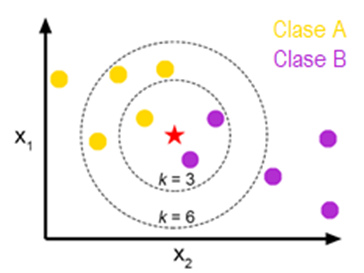

En el anterior ejemplo se ha de predecir la clase del nuevo elemento, la estrella. El algoritmo comienza calculando la distancia con respecto a todo el resto de elementos. En el segundo paso se seleccionan los k-elementos más cercanos, con las circunferencias discontinuas podemos ver los 3 y 6 elementos más próximos. El tercer y último paso es contar el número de elementos de cada clase y en base a ello clasificar, en el caso de 3-Nearst Neighbor la estrella se clasificaría dentro de Clase B, en el caso de 6-Nearest Neighbor la estrella sería Clase A.

Los resultados del modelo cambian significativamente en función del **valor de k**. Cuanto más reduzcamos el valor de k las predicciones se vuelven menos estables, por contrapartida cuanto más aumentemos el valor de k la estabilidad aumenta, pero se comienzan a cometer más errores. Una buena práctica es tomar k un número impar para evitar empates. 

Las **ventajas** del algoritmo KNN son:
- Es sencillo de comprender e implementar.
- Se mantiene estable ante valores atípicos.

Las **desventajas** del algoritmo son:
- Utiliza todo el dataset para entrenar cada nuevo elemento.
- Para grandes dataset requiere muchos recursos computacionales.


In [5]:
 # creamos el dataset de entrenamiento y testeo
#X: características
#y: clase a predecir
#train: conjunto de entrenamiento
#test: conjunto de testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [6]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

# ¿Que especie de lirios tienen los sépalos de 3cm x 5cm y los pétalos de 4cm x 2cm?
print(f"La predicción de los datos {[[4, 9, 4, 5]]} es {iris.target_names[knn.predict([[4, 9, 4, 5]])]}, es decir: {knn.predict_proba([[4, 9, 4, 5]])}")

La predicción de los datos [[4, 9, 4, 5]] es ['virginica'], es decir: [[0.         0.33333333 0.66666667]]


In [7]:
Y_pred = knn.predict(X_test) 

accuracy = accuracy_score(y_test, Y_pred)
precision = precision_score(y_test, Y_pred, average='micro')
recall = recall_score(y_test, Y_pred, average='micro')
f1 = f1_score(y_test, Y_pred, average='micro')

print('accuracy_KNN : %.3f' %accuracy)
print('precision_KNN : %.3f' %precision)
print('recall_KNN: %.3f' %recall)
print('f1-score_KNN : %.3f' %f1)

accuracy_KNN : 0.978
precision_KNN : 0.978
recall_KNN: 0.978
f1-score_KNN : 0.978


In [8]:
cm = confusion_matrix(y_test, Y_pred)
df = px.data.medals_wide(indexed=True)

fig = px.imshow(cm, text_auto=True,  labels=dict(x="Clase de lirio", y="Predición clase de lirio", color="Number"),
               x = ['setosa', 'versicolor', 'virginica'], y = ['setosa', 'versicolor', 'virginica'])
fig.show()

## Naive Bayes

El algoritmo de clasificación de Aprendizaje Automático **Naïve-Bayes** es un clasificador probabilístico basado en el **teorema de Bayes** (siguiente imagen), utilizado para el cálculo de probabilidades de sucesos teniendo cierta información de antemano del suceso, por ejemplo, sabiendo la probabilidad de tener un dolor de cabeza dado que se tiene gripe, se podría saber (si se tiene algún dato más), la probabilidad de tener gripe si se tiene un dolor de cabeza.

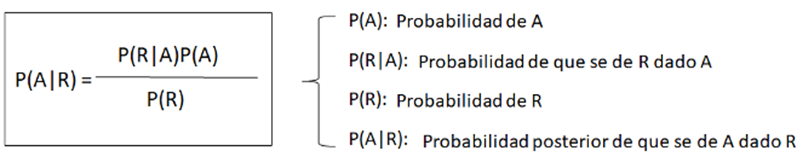

Para implementar el **algoritmo de Naive Bayes** en problemas de clasificación se han de seguir los siguientes pasos:
- **Paso 1:**	Convertir el conjunto de datos en una tabla de frecuencias.
- **Paso 2:**	Crear una tabla de probabilidad calculando las correspondientes a que ocurran los diversos eventos.
- **Paso 3:**	La ecuación Naive Bayes se usa para calcular la probabilidad posterior de cada clase.
- **Paso 4:**	La clase con la probabilidad posterior más alta es el resultado de la predicción.

El algoritmo asume que las variables predictoras son independientes entre sí, es decir, la presencia de una cierta característica en un conjunto de datos no está relacionada con la presencia de cualquier otra característica.

Las **ventajas** de Naive Bayes son las siguientes:
- Es un algoritmo fácil de implementar y rápido en la predicción de clases para problemas de clasificación binarios y multiclase.
- En casos en que sea apropiada una presunción de independencia, el algoritmo se comporta mejor que otros modelos de clasificación, incluso con menos datos de entrenamiento.
- El desacoplamiento de las distribuciones de características condicionales de clase significa que cada distribución puede ser estimada independientemente como si tuviera una sola dimensión, mejorando el rendimiento.

Las **desventajas** a tener en cuenta:
- Aunque son unos clasificadores bastante buenos, los algoritmos Naive Bayes son conocidos por ser pobres estimadores. Por ello, no se deben tomar muy en serio las probabilidades que se obtienen.
- La presunción de independencia Naive muy probablemente no reflejará cómo son los datos en el mundo real.
- Cuando el conjunto de datos de prueba tiene una característica que no ha sido observada en el conjunto de entrenamiento, el modelo le asignará una probabilidad de cero y será inútil realizar predicciones. Uno de los principales métodos para evitar esto, es la técnica de suavizado, siendo la estimación de Laplace una de las más populares.


In [9]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)

GaussianNB()

In [10]:
Y_pred = gaussian.predict(X_test) 

acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
acc_gaussian

93.33

In [11]:
accuracy = accuracy_score(y_test, Y_pred)
precision =precision_score(y_test, Y_pred, average='micro')
recall =  recall_score(y_test, Y_pred, average='micro')
f1 = f1_score(y_test, Y_pred, average='micro')

print('accuracy_Naive Bayes: %.3f' %accuracy)
print('precision_Naive Bayes: %.3f' %precision)
print('recall_Naive Bayes: %.3f' %recall)
print('f1-score_Naive Bayes : %.3f' %f1)

accuracy_Naive Bayes: 1.000
precision_Naive Bayes: 1.000
recall_Naive Bayes: 1.000
f1-score_Naive Bayes : 1.000


In [12]:
cm = confusion_matrix(y_test, Y_pred)

df = px.data.medals_wide(indexed=True)
fig = px.imshow(cm, text_auto=True,  labels=dict(x="Clase de lirio", y="Predición clase de lirio", color="Number"),
               x = ['setosa', 'versicolor', 'virginica'], y = ['setosa', 'versicolor', 'virginica'])
fig.show()


## Árboles de decisión

Los **árboles de decisión** es un modelo predictivo que se representa como un mapa de los posibles resultados de un conjunto de decisiones relacionadas, es un concepto muy importante y base para otros algoritmos de Inteligencia Artificial como Random Forest.

Un árbol de decisión es una estructura de árbol similar a un diagrama de flujo constituido por nodos y ramas, los nodos intermedios representan cada una de las características a considerar para tomar una decisión, las ramas representan la decisión en función de una determinada condición y los nodos finales representan el resultado de la decisión.

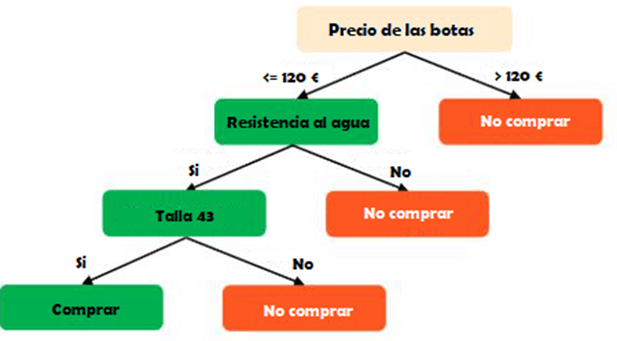

La parte clave del árbol de decisión es cómo realizar las divisiones del árbol, afectando potencialmente a la precisión. Los criterios de decisión son diferentes para los árboles de clasificación y de regresión, se utilizan **múltiples algoritmos para decidir la división de un nodo** en dos o más subnodos, algunos de ellos son: ID3; C4.5, sucesor de ID3; CART, árbol de clasificación y regresión; CHAID, detección automática de interacciones Chi-cuadrado; MARS, splines de regresión adaptativa multivariante. Al final analizaremos el algoritmo ID3 para tener una idea de su funcionamiento. 

Las **ventajas** que presentan los árboles de decisión son las siguientes:
 - Son fáciles de construir, interpretar y visualizar.
 - No es preciso que se cumplan una serie de supuestos como en la regresión lineal (linealidad, normalidad de los residuos, homogeneidad de la varianza, etc.).
 - Sirven tanto para variables dependientes cualitativas como cuantitativas, como para variables predictoras o independientes numéricas y categóricas. 
 - Permiten relaciones no lineales entre las variables explicativas y la variable dependiente.
 - Nos podemos servir de ellos para categorizar variables numéricas.
Por otro lado las **desventajas** son:
 - Tienden al sobreajuste u overfitting de los datos.
 - Se ven influenciadas por los outliers, creando árboles con ramas muy profundas que no predicen bien para nuevos casos.
 - Puede crear árboles demasiado complejos conllevando una mala adaptación a los datos.
 - Se pueden crear árboles sesgados si una de las clases es más numerosa que otra.
 
ID3 (**Iterative Dichotomiser 3**) es un algoritmo de clasificación que sigue un enfoque que busca el mejor atributo que produce la máxima ganancia de información (IG) o la mínima entropía (H).

La **entropía** es una medida de la cantidad de incertidumbre en el conjunto de datos, toma valores entre 0 y 1. Para comprenderlo tomamos un ejemplo de sacar una bola de una bolsa con 3 bolas blancas y 3 negras, el resultado es completamente desconocido, es decir la incertidumbre es máxima, por lo que la entropía es 1. Para el caso de que las bolas sean todas negras, el resultado es conocido de antemano y no hay incertidumbre, la entropía es 0.

La entropía (E) y la **ganancia de información** (IG), que se basa en la entropía, son valores que guían a través del algoritmo ID3 la construcción del árbol de decisión. A continuación la definición de ambos:

$$E(S) = -\sum_{x_{i}\in S} p(x_{i})\log_{2} p(x{i})$$

- $S$ es el conjunto de datos, cambia en cada iteración.
- $x_{i}$ es el conjunto de clases en $S$, los distintos valores que toma.
- $p(x_{i})$ es la probabilidad de la clase $x_i$, el número de elementos de la clase $x_i$ entre el número total de elementos en $S$.

$$IG(S,A) = E(S) - \sum_{c_{i}\in C} \frac{|S_{v}|}{|S|}E(S_{v})$$

- $S_{v}$ los elementos de $S$ para los que la columna $A$ toma el valor $v$. 
- $V(A): $ conjunto de valores que $A$ puede tomar.
- $|S_{v}|$ y $|S|$: número de elementos en $S_{v}$ y $S$.

Los pasos del **algoritmo ID3** son los siguientes:
- **Paso 1**. Calcular la entropía del conjunto de datos.
- **Paso 2**. Calcular la ganancia de información de la característica para todos sus valores categóricos de cada atributo.
- **Paso 3**. Encontrar la característica con la máxima ganancia de información.
- **Paso 4**. Establece nodos secundarios a partir de la característica seleccionada.
- **Paso 5**. Repetir los anteriores tres pasos hasta que no haya categorías para elegir.



In [13]:
DecisionTree = DecisionTreeClassifier(criterion='gini', min_samples_split = 2)
DecisionTree.fit(X_train, y_train);

A continuación vemos el árbol de decisión en detalle como a partir de las ramificaciones del árbol se van clasificando los registros o lirios.

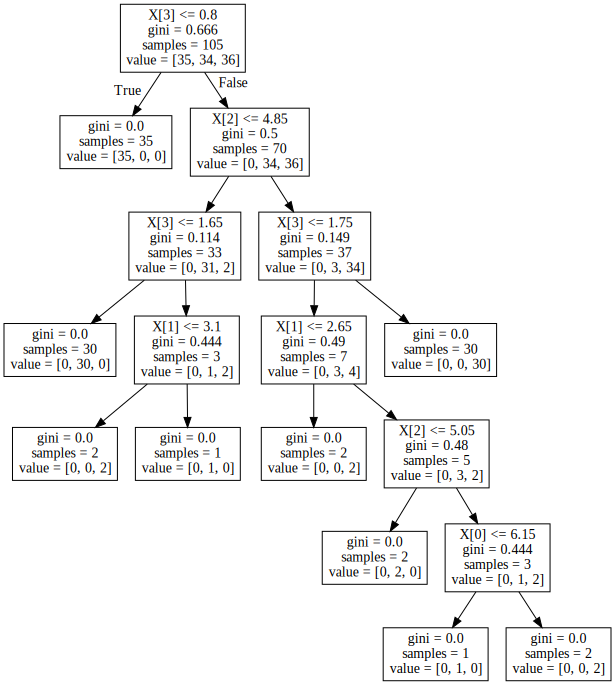

In [14]:
graphviz.Source(tree.export_graphviz(DecisionTree, out_file=None))

In [15]:
Y_pred = DecisionTree.predict(X_test) 

In [16]:
accuracy = accuracy_score(y_test, Y_pred)
precision =precision_score(y_test, Y_pred, average='micro')
recall =  recall_score(y_test, Y_pred, average='micro')
f1 = f1_score(y_test, Y_pred, average='micro')

print('Accuracy Decision Tree: %.3f' %accuracy)
print('Precision Decision Tree: %.3f' %precision)
print('Recall Decision Tree: %.3f' %recall)
print('F1-score Decision Tree: %.3f' %f1)

Accuracy Decision Tree: 0.978
Precision Decision Tree: 0.978
Recall Decision Tree: 0.978
F1-score Decision Tree: 0.978


In [17]:
cm = confusion_matrix(y_test, Y_pred)

df = px.data.medals_wide(indexed=True)
fig = px.imshow(cm, text_auto=True,  labels=dict(x="Clase de lirio", y="Predición clase de lirio", color="Number"),
               x = ['setosa', 'versicolor', 'virginica'], y = ['setosa', 'versicolor', 'virginica'])
fig.show()

## Random Forest

Random Forest es un algoritmo de Inteligencia Artificial de aprendizaje supervisado, está constituido por un conjunto de árboles de decisión cada uno entrenado con una muestra aleatoria extraída de los datos de entrenamiento originales mediante bootstrapping, esto implica que cada árbol se entrena con unos datos ligeramente distintos. Cada árbol individual del bosque aleatorio predice un resultado, el conjunto de resultado supone la predicción resultante de nuestro modelo.

Podemos entender el **algoritmo Random Forest** a partir de los siguientes pasos:
- **Paso 1**: Se toma un subconjunto de registros aleatorios del conjunto total de datos.
- **Paso 2**: Se construyen árboles de decisión individuales para cada muestra.
- **Paso 3**: Cada árbol de decisión genera un resultado.
- **Paso 4**: La predicción final es el voto mayoritario o el promedio para la clasificación y la regresión respectivamente de todos los anteriores árboles de decisión.

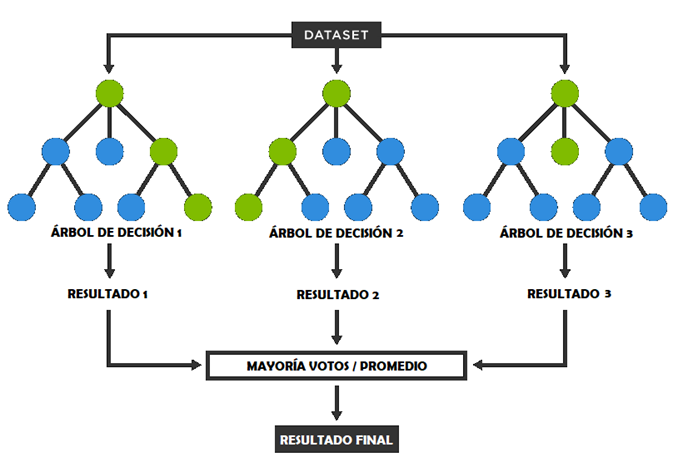
 
En términos más coloquiales el **funcionamiento del algoritmo** se ejemplifica de la siguiente manera: José quiere decidir qué libro leer, quiere predecir qué libro le va a gustar más. Comienza a pedir sugerencias a un primer amigo, este le pregunta sobre sus gustos, en función de las respuestas, le da a José una recomendación. El amigo de José creó reglas para guiar su decisión sobre lo que debía recomendar, utilizando las respuestas de José llegó a un resultado, se trata de un árbol de decisión. Después, José empieza a pedir a más  amigos que le aconsejen y éstos le vuelven a hacer diferentes preguntas de las que pueden derivar algunas recomendaciones. Finalmente, José elige el libro que más le recomiendan, lo cual sería la predicción final del algoritmo de Random Forest.

Para implementar el algoritmo hemos de tener en cuenta los **hiperparámetros**, a continuación los más útiles:
- **n_estimators**: número de árboles que va a tener el bosque aleatorio. Normalmente cuantos más mejor, pero a partir de cierto punto deja de mejorar y sólo hace que vaya más lento. Por defecto se suelen usar 100 árboles.
- **n_jobs**: número de cores que se pueden usar para entrenar los árboles. Cada árbol es independiente del resto, así que entrenar un bosque aleatorio es una tarea muy paralelizable. 
- **max_features**: usa forma de garantizar que los árboles son diferentes, es que todos se entrenan con una muestra aleatoria de los datos. 
- **max_depth**: la profundidad máxima del árbol. 
- **min_samples_split**: número mínimo de muestras necesarias antes de dividir este nodo.
- **min_samples_leaf**: número mínimo de muestras que debe haber en un nodo final.
- **max_leaf_nodes**: número máximo de nodos finales

Las **ventajas** de Random Forest:
- Con un conjunto de datos lo suficientemente grande produce un clasificador muy certero. 
- Proporciona estimaciones de qué variables son más importantes en la predicción. 
- Estabilidad antes nuevas muestras de entrenamiento.
- Reducida posibilidad de riesgo de overfiting.

Por otro lado, las **desventajas** son:
- Para grandes datasets el coste computacional es elevado.
- Los tiempos de entrenamiento se pueden alargar.
- No suele funciona bien con datasets pequeños.
- Comprender el funcionamiento interno es complejo.


In [18]:
classifier = RandomForestClassifier(n_estimators = 50)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [19]:
Y_pred = classifier.predict(X_test)

In [20]:
accuracy = accuracy_score(y_test, Y_pred)
precision =precision_score(y_test, Y_pred, average='micro')
recall =  recall_score(y_test, Y_pred, average='micro')
f1 = f1_score(y_test, Y_pred, average='micro')

print('Accuracy RF: %.3f' %accuracy)
print('Precision RF: %.3f' %precision)
print('Recall RF: %.3f' %recall)
print('F1-score RF: %.3f' %f1)

Accuracy RF: 1.000
Precision RF: 1.000
Recall RF: 1.000
F1-score RF: 1.000


In [21]:
cm = confusion_matrix(y_test, Y_pred)

df = px.data.medals_wide(indexed=True)
fig = px.imshow(cm, text_auto=True,  labels=dict(x="Clase de lirio", y="Predición clase de lirio", color="Number"),
               x = ['setosa', 'versicolor', 'virginica'], y = ['setosa', 'versicolor', 'virginica'])
fig.show()

## Ada Boost

Pertenece a la categoría de técnicas de refuerzo en aprendizaje de conjunto (Ensemble Learning), se trata del primer algoritmo que utiliza la técnica de ‘boosting’ basada en construir un modelo inicial y, en función de los errores producidos, se construye un segundo modelo intentando minimizar los residuos.

El algoritmo utilizado se basa en árboles de decisión de un único nivel (nodo raíz con una única división en ramas (stumps)), aunque en esta técnica los algoritmos base no tienen por qué ser los mismos.

- **Paso 1**: Inicialmente se crea un modelo asignando los mismos pesos a cada observación.

- **Paso 2**: En las siguientes iteraciones se aumentan los pesos de aquellas mal clasificadas, para ello se calcula el error total (suma de los pesos de las observaciones mal clasificadas) y, a partir de este, la importancia.

- **Paso 3**: En cada iteración se generan los pesos asociados a las observaciones, en función de estos se selecciona aleatoriamente la muestra a utilizar en la próxima iteración, de forma que aquellos registros con mayor peso tienen más posibilidades de ser seleccionados. 

- **Paso 4**: El método es iterativo hasta que el error es inferior a una cantidad fija o bien no se puede reducir más o se han superado el número máx de estimadores prefijado. En este caso el clasificador final es una suma ponderada de los estimadores creados.

A continuación se muestra a modo ejemplo, la creación de tres clasificadores que se crean de forma secuencial otorgando mayor peso a aquellos que se clasificaron mal.

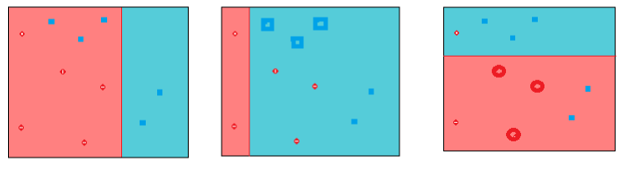

El modelo final se constituye como una ponderación de los anteriores, teniendo:
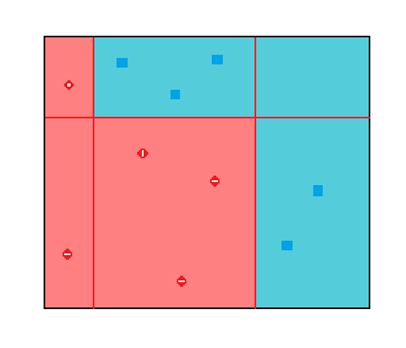

En cuanto a las ventajas de AdaBoost es menos propenso al sobreajuste comparado con los bosques aleatorios, gracias a la técnica de boosting, la desventaja principal de este algoritmo es que es sensible a valores atípicos o ruido, por lo tanto es necesario disponer de una muestra de datos de calidad.

In [22]:
svc = SVC(probability=True, kernel='linear')
abc = AdaBoostClassifier(n_estimators=50, base_estimator=svc, learning_rate=1)
abc.fit(X_train,y_train);

In [23]:
Y_pred = classifier.predict(X_test)

In [24]:
accuracy = accuracy_score(y_test, Y_pred)
precision =precision_score(y_test, Y_pred, average='micro')
recall =  recall_score(y_test, Y_pred, average='micro')
f1 = f1_score(y_test, Y_pred, average='micro')

print('Accuracy AdaBoost: %.3f' %accuracy)
print('Precision AdaBoost: %.3f' %precision)
print('Recall AdaBoost: %.3f' %recall)
print('F1-score AdaBoost: %.3f' %f1)

Accuracy AdaBoost: 1.000
Precision AdaBoost: 1.000
Recall AdaBoost: 1.000
F1-score AdaBoost: 1.000


In [25]:
cm = confusion_matrix(y_test, Y_pred)

df = px.data.medals_wide(indexed=True)
fig = px.imshow(cm, text_auto=True,  labels=dict(x="Clase de lirio", y="Predición clase de lirio", color="Number"),
               x = ['setosa', 'versicolor', 'virginica'], y = ['setosa', 'versicolor', 'virginica'])
fig.show()

## XGBoost - Extreme Gradient Boosting

En cuanto a las ventajas del algoritmo debemos mencionar:
 - Ejecución tanto en sistemas únicos como distribuidos
 - Procesamiento paralelo (nthread)
 - Optimización de caché
 - Gestión de conjuntos de datos que superan la memoria RAM
 - Regularización
 - Maneja valores faltantes
 - Aplicación validación cruzada
 - Efectividad en la poda
 - Los resultados suelen ser bastante buenos cuando se disponen de conjuntos de datos pequeños o medianos, o para datos estructurados con pocas características.
 - Por otra parte, las desventajas son:
 - Los resultados no son muy precisos cuando se evalúan datos no estructurados o escasos.
 - Presenta dificultades a la hora de explicar el procedimiento que ha llevado a las predicciones.
 
Como desventajas, hay otros modelos mejores para:
 - Reconocimiento de Imágenes
 - Problemas de Visión por Computador
 - NLP


In [26]:
#Creating the Xgboost DMatrix data format
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [27]:
parameters = {
    'eta': 0.3,  
    'objective': 'multi:softprob',  # error evaluation for multiclass tasks
    'num_class': 3,  # number of classes to predic
    'max_depth': 3  # depth of the trees in the boosting process
    }  
num_round = 20  # the number of training iterations

bst = xgb.train(parameters, dtrain, num_round);

[17:16:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [28]:
Y_pred = bst.predict(dtest)
Y_pred = np.asarray([np.argmax(line) for line in Y_pred]) # tomamos la clase con mayor probabilidad

In [29]:
accuracy = accuracy_score(y_test, Y_pred)
precision =precision_score(y_test, Y_pred, average='micro')
recall =  recall_score(y_test, Y_pred, average='micro')
f1 = f1_score(y_test, Y_pred, average='micro')

print('Accuracy XGBoost: %.3f' %accuracy)
print('Precision XGBoost: %.3f' %precision)
print('Recall XGBoost: %.3f' %recall)
print('F1-score XGBoost: %.3f' %f1)

Accuracy XGBoost: 1.000
Precision XGBoost: 1.000
Recall XGBoost: 1.000
F1-score XGBoost: 1.000


In [30]:
cm = confusion_matrix(y_test, Y_pred)

df = px.data.medals_wide(indexed=True)
fig = px.imshow(cm, text_auto=True,  labels=dict(x="Clase de lirio", y="Predición clase de lirio", color="Number"),
               x = ['setosa', 'versicolor', 'virginica'], y = ['setosa', 'versicolor', 'virginica'])
fig.show()

## Linear Support Vector Classifier - SVM

In [31]:
linear_svc = LinearSVC(max_iter=4000)

In [32]:
linear_svc.fit(X_train, y_train)
Y_pred = linear_svc.predict(X_test)

In [33]:
accuracy = accuracy_score(y_test, Y_pred)
precision =precision_score(y_test, Y_pred, average='micro')
recall =  recall_score(y_test, Y_pred, average='micro')
f1 = f1_score(y_test, Y_pred, average='micro')

print('Accuracy Linear SVC: %.3f' %accuracy)
print('Precision Linear SVC: %.3f' %precision)
print('Recall Linear SVC: %.3f' %recall)
print('F1-score Linear SVC: %.3f' %f1)

Accuracy Linear SVC: 0.956
Precision Linear SVC: 0.956
Recall Linear SVC: 0.956
F1-score Linear SVC: 0.956


In [34]:
cm = confusion_matrix(y_test, Y_pred)

df = px.data.medals_wide(indexed=True)
fig = px.imshow(cm, text_auto=True,  labels=dict(x="Clase de lirio", y="Predición clase de lirio", color="Number"),
               x = ['setosa', 'versicolor', 'virginica'], y = ['setosa', 'versicolor', 'virginica'])
fig.show()